## TPSAPR22 EDA which makes sense ⭐️⭐️⭐️⭐️⭐️
https://www.kaggle.com/code/ambrosm/tpsapr22-eda-which-makes-sense

In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
from cycler import cycler 
from IPython.display import display
import datetime

from sklearn.decomposition import PCA

plt.rcParams['axes.facecolor'] = '#007dbc' # DKT blue
plt.rcParams['axes.prop_cycle'] = cycler(color=['#ffd700'] + 
                                         plt.rcParams[
                                             'axes.prop_cycle'].by_key()[
                                                 'color'][1:])

In [12]:
train = pd.read_csv('../tps-apr-2022/train.csv')
train_labels = pd.read_csv('../tps-apr-2022/train_labels.csv')
test = pd.read_csv('../tps-apr-2022/test.csv')

print()
print('Train')
display(train.head())

print()
print('Train_labels')
display(train_labels.head())

print()
print('Test')
display(train_labels.head())

print('Dataframe shapes:', train.shape, train_labels.shape, 
      test.shape)
print()
print(f'Sequence numbering in train_labels: from {train_labels.sequence.min()}' + 
      f' to {train_labels.sequence.max()}')
print()
print(f'Step numbering: from {train.step.min()}' + 
      f' to {train.step.max()}')
print()
print(f'Subject numbering in train: from {train.subject.min()}' + 
      f' to {train.subject.max()}')
print()
print(f'Subject numbering in test: from {test.subject.min()}' + 
      f' to {test.subject.max()}')
print()
print(f'States: {np.unique(train_labels.state)}')



Train


,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359



Train_labels


,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1



Test


,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


Dataframe shapes: (1558080, 16) (25968, 2) (733080, 16)

Sequence numbering in train_labels: from 0 to 25967

Step numbering: from 0 to 59

Subject numbering in train: from 0 to 671

Subject numbering in test: from 672 to 990

States: [0 1]


472      2
73       5
265      6
519      7
486      7
      ... 
87     129
647    144
635    158
1      175
437    199
Name: sequence count per training subject, Length: 672, dtype: int64
823      8
943     10
973     11
975     11
830     11
      ... 
874     98
865     99
781    103
682    107
748    148
Name: sequence count per test subject, Length: 319, dtype: int64


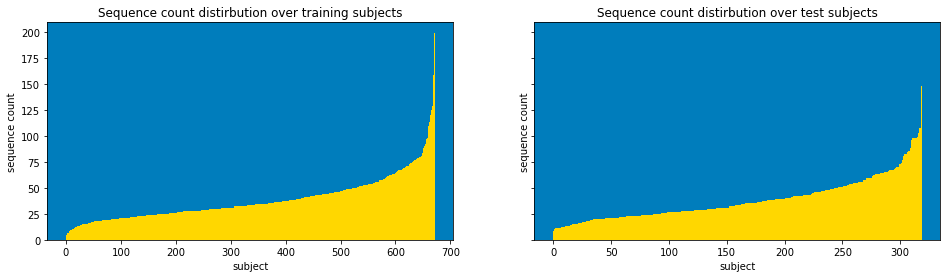

In [15]:
plt.subplots(1, 2, sharey=True, figsize=(16, 4))

def plot_sequence_count_distribution(df, title):
    temp = df.subject.value_counts().sort_values() // 60 # round down division
    plt.bar(range(len(temp)), temp, width=1)
    plt.xlabel('subject')
    plt.ylabel('sequence count')
    plt.title(f'Sequence count distirbution over {title} subjects')
    print(temp.sort_values().rename(f'sequence count per {title} subject'))

plt.subplot(1, 2, 1)
plot_sequence_count_distribution(train, 'training')
plt.subplot(1, 2, 2)
plot_sequence_count_distribution(test, 'test')
plt.show()

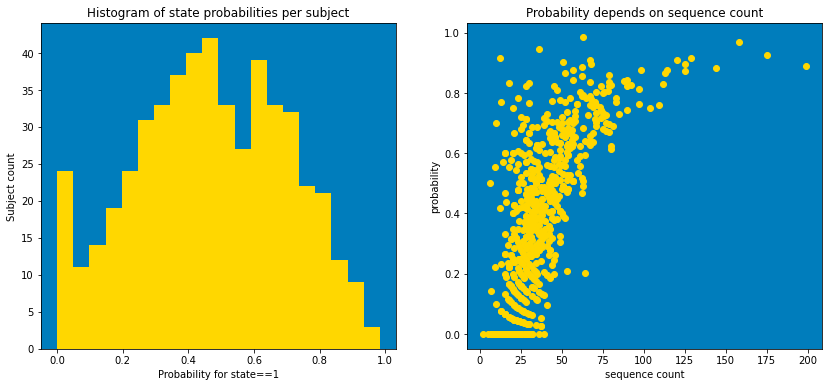


The standard deviation of 0.23 is much higher than 0.1

Subjects which are always in state 0: 59


In [18]:
temp = train.groupby('sequence').subject.min()
temp = train_labels.merge(temp, on='sequence')
temp = temp.groupby('subject').agg({'state': 'mean', 
                                    'sequence': 'count'}).rename(
                                        columns={'state': 'probability', 
                                                 'sequence': 'sequence_count'}
                                    )
temp1 = temp[temp.sequence_count>=25].probability.rename('Probability of state==1')

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(temp1, bins=20)
plt.ylabel('Subject count')
plt.xlabel('Probability for state==1')
plt.title('Histogram of state probabilities per subject')

plt.subplot(1, 2, 2)
plt.scatter(temp.sequence_count, temp.probability)
plt.xlabel('sequence count')
plt.ylabel('probability')
plt.title('Probability depends on sequence count')
plt.show()

print()
print(f'The standard deviation of {temp[temp.sequence_count>=25].probability.std():.2f}' + 
      ' is much higher than 0.1')
print()
print('Subjects which are always in state 0:', (temp.probability==0).sum())